In [1]:

import json
import yaml

    
def dict_array_upend(mydict,key,elem):
    if key not in mydict:
        mydict[key]=[]
    mydict[key.append(elem)]

def load_sensor_log_file(fname):
    response=[]
    first_timestamp=0
    f=open(fname,'r')
    for line in f.readlines():        
        dat=json.loads(line)
        timestamp=dat["timestamp"]-first_timestamp
        response.append(dat)
        if first_timestamp==0:                        
            first_timestamp=timestamp
    return response,first_timestamp
        
sensor_log,first_timestamp=load_sensor_log_file("../to_study/track_stop_sign.txt")

6 objects found
bird
bird
6
refrigerator
refrigerator
253


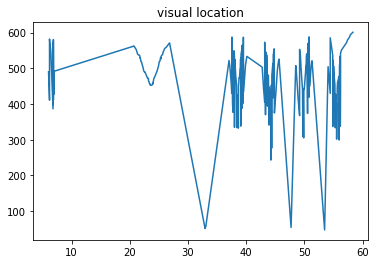

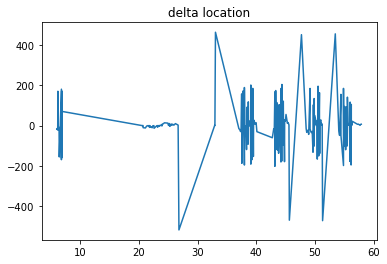

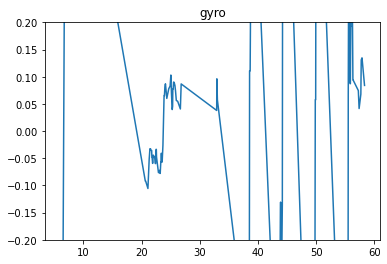

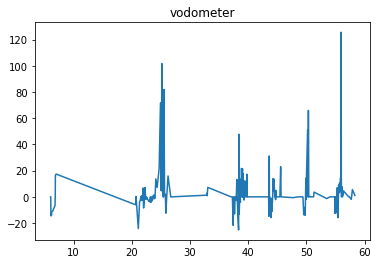

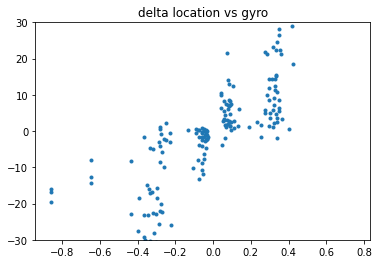

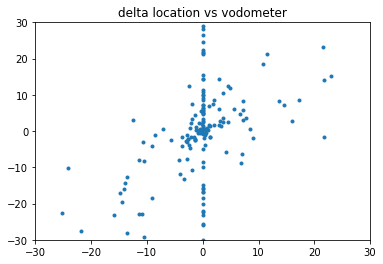

sports ball
sports ball
1574


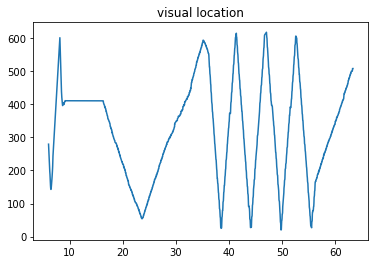

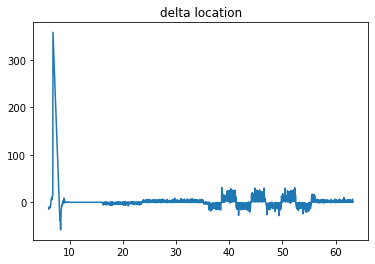

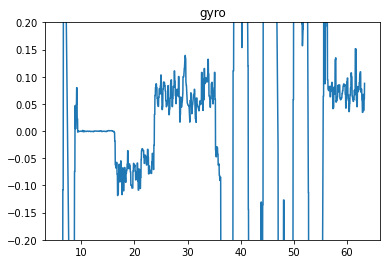

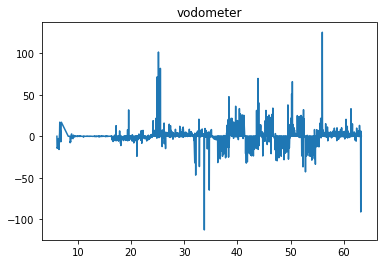

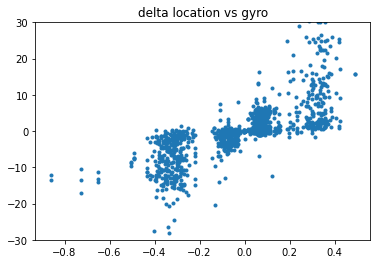

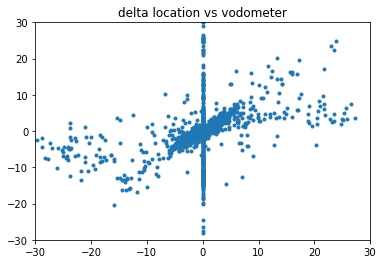

oven
oven
12
stop sign
stop sign
1048


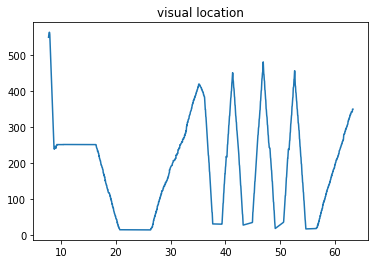

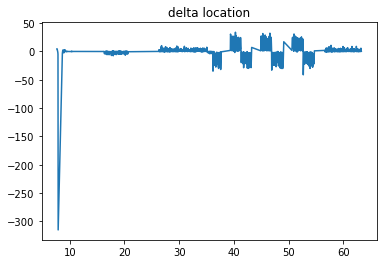

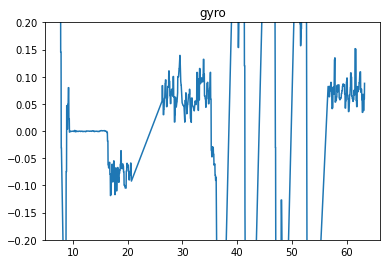

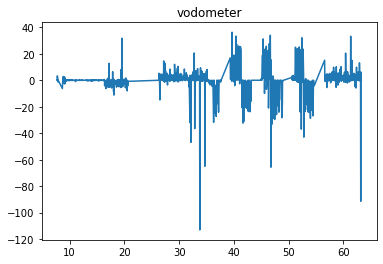

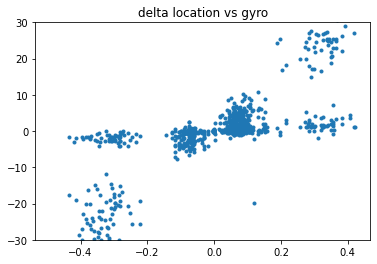

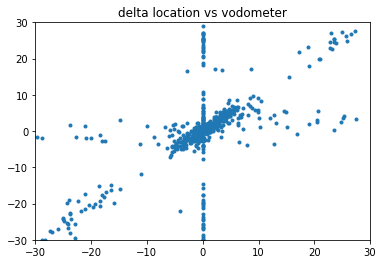

person
person
2


In [9]:
from matplotlib import pyplot as plt
import numpy as np
from collections import deque
position_by_object={}
label_by_object={}

#
z_gyros=deque([0],3)
last_z_gyro=0
last_vodometer=0
last_vodometer_stdevsq=0

start_timestamp=sensor_log[0]['timestamp']
for message in sensor_log:
    if "tagged_objects" in message:
        m=message["tagged_objects"]
        for obj in m:
            if obj["label"] not in position_by_object:
                position_by_object[obj["label"]]=[]
            label_by_object[obj["label"]]=obj["label"]
            x=0.5*(obj["startx"]+obj["endx"])
            position_by_object[obj["label"]].append([x,last_z_gyro,message["timestamp"]-start_timestamp,last_vodometer,np.sqrt(last_vodometer_stdevsq)])
        last_vodometer=0
        last_vodometer_stdevsq=0
        #last_z_gyro=0
    #if "visual_tracker_objects" in message:
#        m=message["visual_tracker_objects"]
#        for obj in m:
#            if obj["id"] not in position_by_object:
#                position_by_object[obj["id"]]=[]
#            label_by_object[obj["id"]]=obj["label"]
#            position_by_object[obj["id"]].append([*obj["xywh"],*obj["vxvyvwvh"],last_z_gyro,message["timestamp"]-start_timestamp,last_vodometer])
    if "video_offset" in message:
            m=message["video_offset"]
            #last_vodometer=m[2]
            if abs(m[0])<200:
                last_vodometer+=m[0]
                last_vodometer_stdevsq+=m[2]*m[2]
            #print("adding offset {} to {} ".format(m[2]/video_offset_scale,on_state_vector[11]))        
    if "position_sensor/gyro" in message:
            m=message["position_sensor/gyro"]
            if abs(m[2])<20:            
                #z_gyros.append(m[2])
                last_z_gyro=m[2]
                #last_z_gyro=np.average(z_gyros)
                #last_z_gyro+=m[2]
                
print("{} objects found".format(len(position_by_object)))


#objlen=[ len(position_by_object[k]) for k in position_by_object ]
for k in position_by_object:
    print("{}".format(k))
    print("{}".format(label_by_object[k]))
    print("{}".format(len(position_by_object[k])))
    
    if len(position_by_object[k])>100:
        t=np.array(position_by_object[k])
        delta_t=t[1:]-t[:-1]

        #print("t shape {}".format(t.shape))
        plt.figure()
        plt.title("visual location")
        plt.plot(t[:,2],t[:,0])
        plt.show()
        plt.figure()
        plt.title("delta location")
        plt.plot(t[:-1,2],delta_t[:,0])
        plt.show()
        plt.figure()
        plt.title("gyro")
        plt.ylim(-0.2,0.2)
        plt.plot(t[:,2],t[:,1])
        plt.show()
        plt.figure()
        plt.title("vodometer")
        #plt.plot(t[:,2],t[:,3]/t[:,4])
        plt.plot(t[:,2],t[:,3])
        plt.show()
        #plt.figure()
        #plt.plot(t[:,4])
        #plt.show()
        plt.figure()
        plt.title("delta location vs gyro")
        plt.ylim(-30,30)
        plt.plot(t[1:,1],delta_t[:,0],'.')
        plt.show()
        plt.figure()
        plt.title("delta location vs vodometer")
        plt.ylim(-30,30)
        plt.xlim(-30,30)
        plt.plot(t[1:,3],delta_t[:,0],'.')
        plt.show()
        
#plt.figure()
#plt.hist(objlen,192)
#plt.show()

In [3]:
for k in position_by_object:    
    if len(position_by_object[k])>100:
        t=np.array(position_by_object[k])

